Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

Content
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

- ID: ID Number of Customers.

- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

- Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

- Cost of the product: Cost of the Product in US Dollars.

- Prior purchases: The Number of Prior Purchase.

- Product importance: The company has categorized the product in the various parameter such as low, medium, high.

- Gender: Male and Female.

- Discount offered: Discount offered on that specific product.

- Weight in gms: It is the weight in grams.

- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

<br>


Inspiration
This data of Product Shipment Tracking, found on kaggle:
https://www.kaggle.com/prachi13/customer-analytics 

# Aim: Bring about maximal insights to the the company in any possible way

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 500)

#### Reading datasets

In [4]:
df = pd.read_csv('logistics.csv')
df.head(3)
col_names = list(df.columns)
col_names[-1] = 'Not_on_time'
df.columns = col_names
#df.to_csv('logistics updated.csv')

In [5]:
df = pd.read_csv('logistics updated.csv', index_col=0)
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Not_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


In [6]:
#[f(x) if condition else g(x) for x in sequence]
on_time = pd.Series([False if x==1 else True for x in df.Not_on_time])
df['on_time'] = on_time
df.drop(columns = 'Not_on_time', inplace=True)
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,False
1,2,F,Flight,4,5,216,2,low,M,59,3088,False
2,3,A,Flight,2,2,183,4,low,M,48,3374,False


In [7]:
df['on_time'].value_counts()

False    6563
True     4436
Name: on_time, dtype: int64

In [8]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
on_time                  bool
dtype: object

In [9]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


#### Categorical vs Continuous variables

In [10]:
df.drop(columns=['ID'], inplace=True)
continuous_variables = ['Customer_care_calls','Cost_of_the_Product', 'Prior_purchases','Discount_offered','Weight_in_gms']
cateogrical_variables = [x for x in df.columns if x not in continuous_variables]
print('cateogrical: {}'.format(cateogrical_variables))
print('continuous: {}'.format(continuous_variables))


cateogrical: ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'on_time']
continuous: ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


In [11]:
for i in cateogrical_variables:
    print(df[i].value_counts())

F    3666
D    1834
A    1833
C    1833
B    1833
Name: Warehouse_block, dtype: int64
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
F    5545
M    5454
Name: Gender, dtype: int64
False    6563
True     4436
Name: on_time, dtype: int64


#### Simple feature engineering

In [12]:
df['Percentage_discount'] =(df['Discount_offered']/df['Cost_of_the_Product']*100).round(2)

# EDA

## Univariate data analysis

### #Categorical

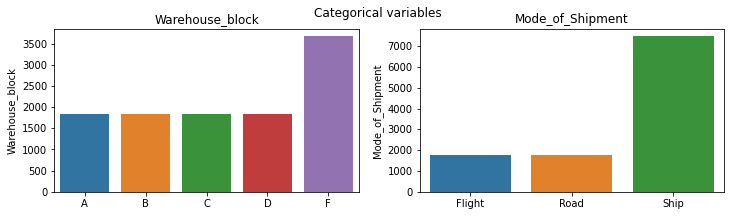

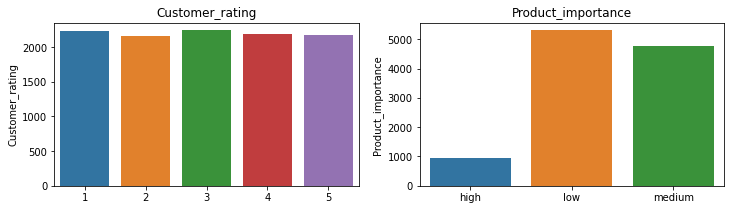

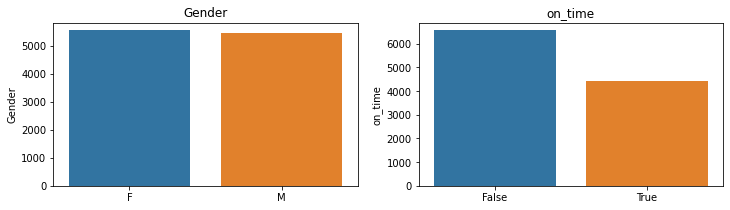

In [13]:
def cateogrial_plot(variable):
    height = df[variable].value_counts()
    height.sort_index(inplace=True)
    return height.index, height
fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
fig.suptitle('Categorical variables')
i = 0
for variable in cateogrical_variables[:2]:
    indexes, height = cateogrial_plot(variable)
    sns.barplot(ax = axes[i], x = indexes, y = height)
    axes[i].set_title(variable)
    i+=1
fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
i = 0
for variable in cateogrical_variables[2:4]:
    indexes, height = cateogrial_plot(variable)
    sns.barplot(ax = axes[i], x = indexes, y = height)
    axes[i].set_title(variable)
    i+=1
i = 0
fig, axes = plt.subplots(ncols=2, figsize=(12, 3))
for variable in cateogrical_variables[4:]:
    indexes, height = cateogrial_plot(variable)
    sns.barplot(ax = axes[i], x = indexes, y = height)
    axes[i].set_title(variable)
    i+=1

## Takeaways:
Warehouse `F` deals with most products

`Ship` is the most common way of delivery

Customer rating is fairly uniform across all scores

Most products are either of `low` or `medium` importance

Equal `male` and `female` customers

Generally the company has more deliveries that are `late`

In [14]:
# #plt.title('Cateogrical variables')
# for variable in cateogrical_variables:
#     fig, ax = plt.subplots(figsize=(3, 2))
#     ax.set_title(variable)
#     height = df[variable].value_counts()
#     height.sort_index(inplace=True)
#     sns.barplot(height.index, height)

### #Continuous

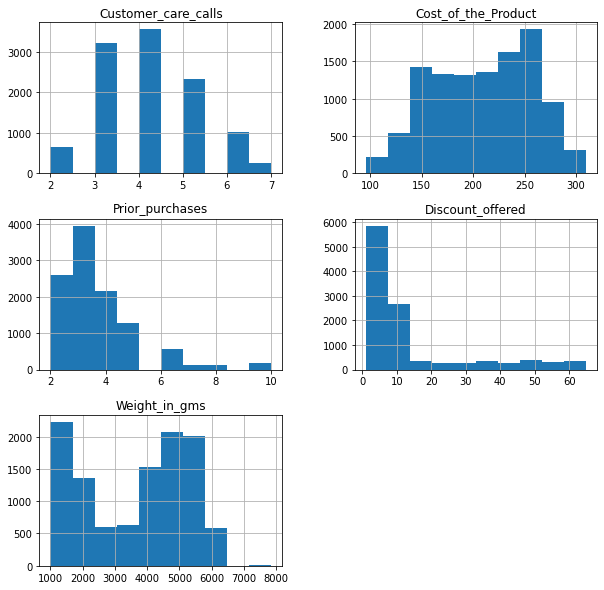

In [15]:
ax = df[continuous_variables].hist(figsize=(10,10), bins = 10)

## Takeaways:
Calls by customer to customer care follows a seemingly bell shaped distribtuion

Cost of product seems to follow a plateau shape

Prior purchases seemingly follow a log normal curve

Discount offered follows an decreasingly exponential shape

Weight in grams seems to be bimodal

### #Heatmap

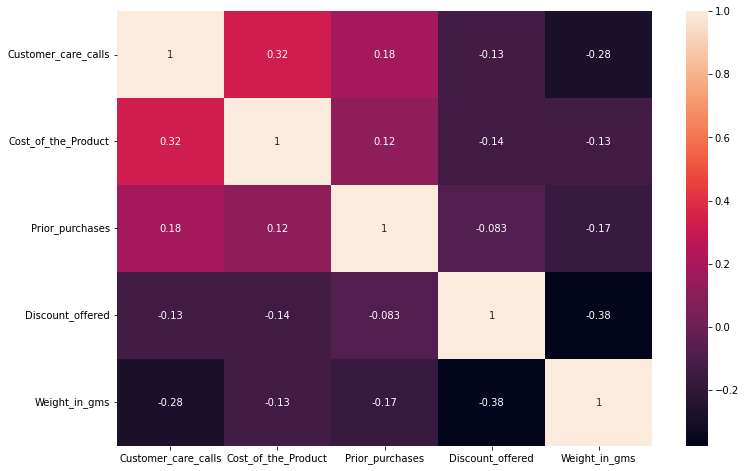

In [16]:
scores = df[continuous_variables].corr()
plt.figure(figsize=(12,8))
ax = sns.heatmap(scores, annot=True)

No signs of multicollinearity, with highest related fields being Discount offered and the weight of packages, standing at a 0.38 relation (Much lower than 0.7 usually suggested)

1) Interestingly, higher discounts does correspond to lower weight packages. -> Customers are probably more quick to make purchases when there is a sale

2) Higher costing product correspond to more customer care calls -> Customers are more anxious about getting their items when they make bigger ticket purchases

3) Higher weighted items correspond to lower customer care calls -> Customer are likely more understanding that heavier items take longer to ship

4) Also notable is that lighter weighted objects corresponds to costlier products -> Its probably specific to the electronics sector

In [17]:
# Helper function
def order_by_impt(dataset):
    idx = pd.Categorical(dataset['Product_importance'],
          categories=['high','medium','low'],
          ordered=True)
    dataset['Product_importance'] = idx
    return dataset

In [18]:
product_summary = pd.DataFrame(df.groupby(['Product_importance','Mode_of_Shipment']).count().iloc[:,1])
percentage = product_summary.groupby('Product_importance', as_index = False).apply(lambda x: (x/x.sum()*100).round(2))
percentage['Percentage (%)'] = percentage['Customer_care_calls'].apply(lambda x: str(x)+' %')
product_summary_full = pd.concat([product_summary, percentage], axis=1)
product_summary_full.columns = ['Count', 'Proportion', 'Percentage (%)']
#product_summary_full.iloc[:,[0,2]]

product_summary_full.reset_index(inplace = True)
product_summary_full = order_by_impt(product_summary_full)
product_summary_full.sort_values('Product_importance').set_index(['Product_importance','Mode_of_Shipment']).iloc[:,[0,2]]

Count Percentage (%)
Product_importance Mode_of_Shipment                      
high               Flight              163        17.19 %
                   Road                158        16.67 %
                   Ship                627        66.14 %
medium             Flight              776        16.32 %
                   Road                745        15.67 %
                   Ship               3233        68.01 %
low                Flight              838        15.82 %
                   Road                857        16.18 %
                   Ship               3602         68.0 %

It seems that  the company does not discern the mode of delivery based on importance of product

In [19]:
product_summary = df.groupby(['Product_importance','on_time']).count().loc[:,['Mode_of_Shipment']]
product_summary
percentage = product_summary.groupby('Product_importance', as_index = False).apply(lambda x: (x/x.sum()*100).round(2))
percentage['Mode_of_Shipment'] = percentage['Mode_of_Shipment'].apply(lambda x: str(x)+' %')
product_summary_full = pd.concat([product_summary, percentage], axis=1)
product_summary_full.columns = ['Count', 'Percentage (%)']

product_summary_full.reset_index(inplace = True)
product_summary_full = order_by_impt(product_summary_full)
product_summary_full.sort_values('on_time', ascending = False).sort_values('Product_importance').set_index(['Product_importance','on_time'])

Count Percentage (%)
Product_importance on_time                      
high               True       332        35.02 %
                   False      616        64.98 %
medium             True      1947        40.95 %
                   False     2807        59.05 %
low                True      2157        40.72 %
                   False     3140        59.28 %

Not much disrepancy between `medium` and `low` importance products. Might be more efficient to classify them together unless there is seperate use cases for this metric.

Product of `high` importance is more likely to be late than product with `medium`/`low` importance by a good 5%. 

This is definitely not a good sign as we will assume Product rated with high importance should be delivered timely. Unless the `Product_importance` is based on some other metric and not urgency of delivery

## Discerning what determines the `Product_importance`

In [20]:
weights = df.groupby(['Product_importance'], as_index=False)['Cost_of_the_Product'].agg(['min', lambda x: np.quantile(x,0.25), lambda x: x.mean().round(2), lambda x: np.quantile(x,0.75), 'max']).reset_index()
weights.columns = ['Product_importance','min','25th','mean','75th','max']
order_by_impt(weights).sort_values('Product_importance').set_index('Product_importance')

,min,25th,mean,75th,max
Product_importance,,,,,
high,96,165,203.87,243,307
medium,96,169,209.38,250,310
low,96,171,212.06,253,310


Cost does not positively correlate to importance of product

In [21]:
weights = df.groupby(['Product_importance'], as_index=False)['Weight_in_gms'].agg(['min', lambda x: np.quantile(x,0.25), lambda x: x.mean().round(2), lambda x: np.quantile(x,0.75), 'max']).reset_index()
weights.columns = ['Product_importance','min','25th','mean','75th','max']
order_by_impt(weights).sort_values('Product_importance').set_index('Product_importance')

,min,25th,mean,75th,max
Product_importance,,,,,
high,1007,2848.75,4005.55,5204.00,6000
medium,1001,1924.50,3712.05,5066.75,7846
low,1001,1718.00,3497.49,5011.00,6000


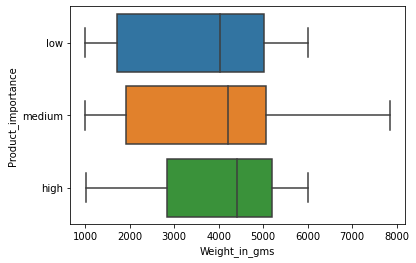

In [22]:
ax = sns.boxplot(y='Product_importance', x='Weight_in_gms', data = df)

Seems like the correlation of importance of product ties back to weight of product => Higher weight implies higher product importance

In [23]:
df1 = df.copy()
df1['cost_density'] = df1['Cost_of_the_Product']/df1['Weight_in_gms']
weights = df1.groupby(['Product_importance'], as_index=False)['cost_density'].agg(['min', lambda x: np.quantile(x,0.25), lambda x: x.mean().round(2), lambda x: np.quantile(x,0.75), 'max']).reset_index()
weights.columns = ['Product_importance','min','25th','mean','75th','max']
print('\t\t\tCost density')
order_by_impt(weights).sort_values('Product_importance').set_index('Product_importance')

			Cost density


,min,25th,mean,75th,max
Product_importance,,,,,
high,0.017608,0.038425,0.06,0.077155,0.269119
medium,0.016771,0.039163,0.08,0.096845,0.302094
low,0.016482,0.040399,0.09,0.119637,0.309073


Evidence that reflect maybe `medium` and `low` importance product can be categorized together

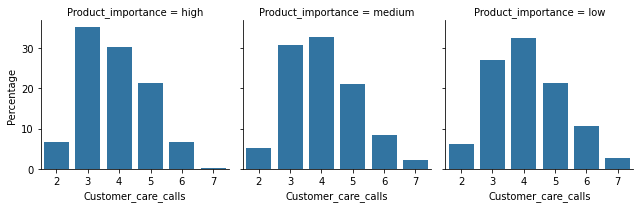

In [24]:
count_for_plot = df.groupby(['Product_importance','Customer_care_calls']).count().iloc[:,0].reset_index()
count_for_plot.rename({'Warehouse_block':'Count'}, axis = 1, inplace=True)
idx = pd.Categorical(count_for_plot['Product_importance'],
          categories=['high','medium','low'],
          ordered=True)
count_for_plot['Product_importance'] = idx
percentage = count_for_plot.groupby('Product_importance')['Count'].apply(lambda x: (x/x.sum()*100).round(2))
count_for_plot['Percentage'] = percentage
#count_for_plot
g = sns.FacetGrid(count_for_plot, col="Product_importance", margin_titles=True)
ax = g.map_dataframe(sns.barplot, x='Customer_care_calls',y="Percentage")

Further analysis show that product importance does not correspond to more `customer care calls`, which implies product importance is probably an internal metric for shipping purposes

Conclusion: Higher importance product means heavier products => Probably implies more manpower needed to transport such goods

### Why are shipments arriving late?

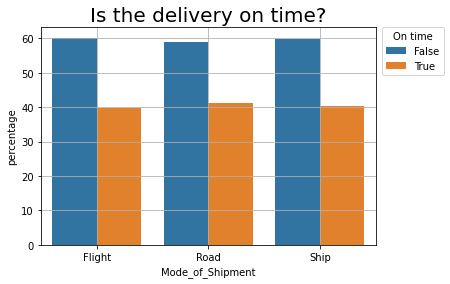

In [25]:
percentage_late = df.groupby(['Mode_of_Shipment','on_time']).count().iloc[:,1].reset_index()
percentage_late['percentage'] = percentage_late.groupby('Mode_of_Shipment')['Customer_care_calls'].apply(lambda x: (x/x.sum()*100).round(2))

sns.barplot(x='Mode_of_Shipment',y='percentage', hue = 'on_time', data = percentage_late)
plt.title('Is the delivery on time?', size = 20)
plt.grid()
ax = plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'On time')

Regardless the shipment mode, seems like they have an equal likelihood to be late

In [26]:
percentage_late

,Mode_of_Shipment,on_time,Customer_care_calls,percentage
0,Flight,False,1069,60.16
1,Flight,True,708,39.84
2,Road,False,1035,58.81
3,Road,True,725,41.19
4,Ship,False,4459,59.76
5,Ship,True,3003,40.24


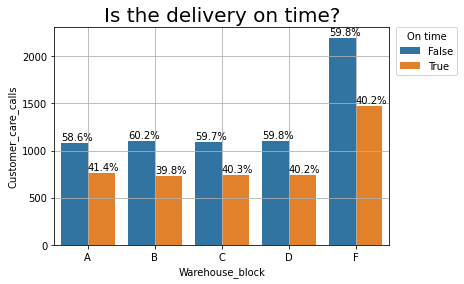

In [27]:
percentage_late = df.groupby(['Warehouse_block','on_time']).count().iloc[:,1].reset_index()
percentage_late['percentage'] = percentage_late.groupby('Warehouse_block')['Customer_care_calls'].apply(lambda x: (x/x.sum()*100).round(1))
percentage_late['percentage'] = percentage_late['percentage'].apply(lambda x: str(x)+'%')

ax = sns.barplot(x='Warehouse_block',y='Customer_care_calls', hue = 'on_time', data = percentage_late)
start = 0
for i in [0,2,4,6,8]:
    x1 = start - 0.4
    x2 = start
    start +=1
    y1 = percentage_late.iloc[i,2] + 30
    s1 = percentage_late.iloc[i,3]
    y2 = percentage_late.iloc[i+1,2]+ 30
    s2 = percentage_late.iloc[i+1,3]
    ax.text(x1,y1,s1)
    ax.text(x2,y2,s2)
plt.title('Is the delivery on time?', size = 20)
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title = 'On time')

Seems like all warehouses are equally efficient in delivery as well

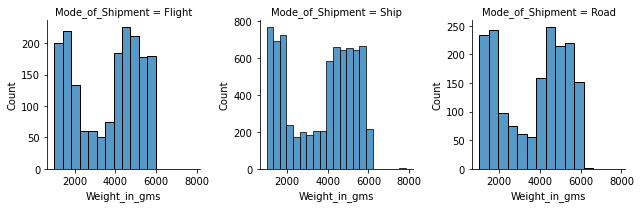

In [28]:
g = sns.FacetGrid(df, col="Mode_of_Shipment", sharey=False)
ax = g.map_dataframe(sns.histplot, x='Weight_in_gms')

Distribution of weights of delivered product are almost identical, meaning that delivery mode is probably based on proximity rather than weight

In [29]:
df.groupby('on_time')['Customer_rating'].mean()

on_time
False    3.005790
True     2.967989
Name: Customer_rating, dtype: float64

In [30]:
df.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time,Percentage_discount
0,D,Flight,4,2,177,3,low,F,44,1233,False,24.86
1,F,Flight,4,5,216,2,low,M,59,3088,False,27.31


### Return customers = Better ratings?

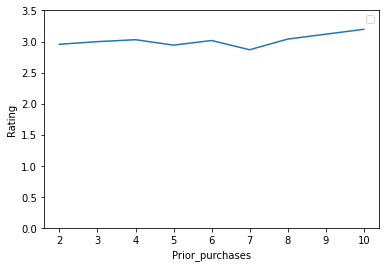

In [31]:
df.groupby(['Prior_purchases'], as_index=False)['Customer_rating'].mean().plot(x = 'Prior_purchases',y = 'Customer_rating')
plt.ylim(0,3.5)
plt.ylabel('Rating')
plt.legend([],[])

General uptrend of `ratings` as the number of `Prior purchases` increases => Return customers are usually happy customers

### Discount = Better sales/ratings?

In [32]:
df.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,on_time,Percentage_discount
0,D,Flight,4,2,177,3,low,F,44,1233,False,24.86
1,F,Flight,4,5,216,2,low,M,59,3088,False,27.31


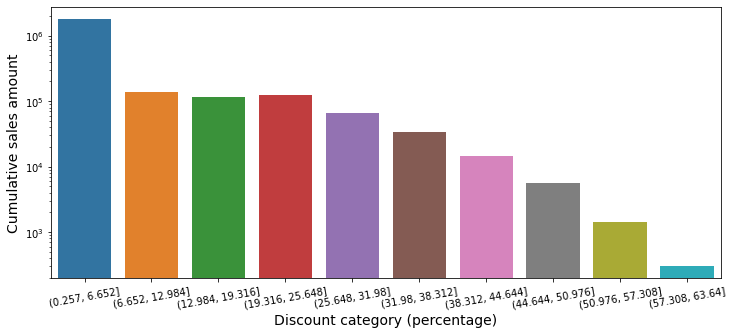

In [33]:
df['Discount_category'] = pd.cut(df['Percentage_discount'],bins=10)
sales = df.groupby('Discount_category')['Cost_of_the_Product'].sum().reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(x = 'Discount_category', y = 'Cost_of_the_Product',data = sales)
ax.set_yscale('log')
ax.set_xlabel('Discount category (percentage)', size = 14)
ax.set_ylabel('Cumulative sales amount', size = 14)
ax.tick_params(axis='x', rotation=10)

Large discount don't seem to drive overall sales for the company => Can focus on service standard rather than having big sales

In [34]:
df1 = df.copy()
df1['Discount_category_2'] = pd.cut(df['Percentage_discount'],bins=5)
sales_gender = df1.groupby(['Gender','Discount_category_2'], as_index=False)['Cost_of_the_Product'].agg(['sum','count'])
sales_gender['proportion'] = sales_gender.groupby('Gender')['count'].apply(lambda x: (x/x.sum()).round(2)*100)
sales_gender.reset_index(inplace=True)
sales_gender

,Gender,Discount_category_2,sum,count,proportion
0,F,"(0.257, 12.984]",970337,4544,82.0
1,F,"(12.984, 25.648]",127081,617,11.0
2,F,"(25.648, 38.312]",51188,297,5.0
3,F,"(38.312, 50.976]",10965,80,1.0
4,F,"(50.976, 63.64]",748,7,0.0
5,M,"(0.257, 12.984]",976376,4533,83.0
6,M,"(12.984, 25.648]",116328,557,10.0
7,M,"(25.648, 38.312]",48754,288,5.0
8,M,"(38.312, 50.976]",9204,67,1.0
9,M,"(50.976, 63.64]",974,9,0.0


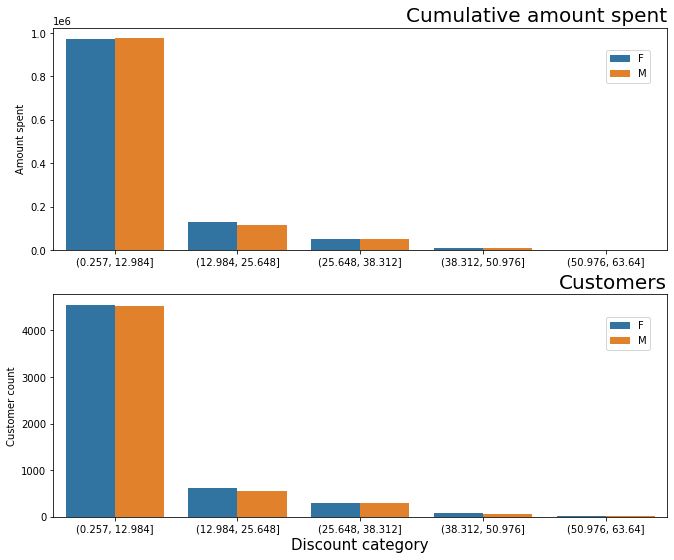

In [35]:
fig, axes = plt.subplots(2, figsize=(11, 9))
ax1 = sns.barplot(ax = axes[0], x = 'Discount_category_2', y = 'sum', data = sales_gender, hue = 'Gender')
ax1.set_title('Cumulative amount spent', size = 20, loc = 'Right')
ax1.set_xlabel('')
ax1.set_ylabel('Amount spent')
ax2 = sns.barplot(ax = axes[1], x = 'Discount_category_2', y='count', data = sales_gender,hue = 'Gender')
ax2.set_title('Customers', size = 20, loc = 'Right')
ax2.set_xlabel('Discount category', size = 15)
ax2.set_ylabel('Customer count')
ax1.legend(bbox_to_anchor=(0.9, 0.9), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(0.9, 0.9), loc=2, borderaxespad=0.)

As observed, both genders have similar buying pattern regardless of discounts => No inclination to target a certain group for marketing purposes

# Next Up:
## Machine Learning
We work on understanding whether we can accurately predict whether shipment will be on time

## Feature Selection

In [36]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [37]:
variables_to_transform = ['Warehouse_block', 'Mode_of_Shipment','Product_importance','Gender','on_time','Discount_category']
df1 = df.copy()
df1[variables_to_transform] = df[variables_to_transform].astype('category')
df1[variables_to_transform] = df1[variables_to_transform].apply(lambda x: x.cat.codes, axis = 0)

In [38]:
Features = df1.drop(['on_time'], axis = 1)
Target = df1[['on_time']]

#### Random forest

In [39]:
forest = RandomForestClassifier(random_state=1)
forest.fit(Features, Target)
importance = forest.feature_importances_
importance_df = pd.DataFrame()
importance_df['feature'] = Features.columns
importance_df['importance'] = importance
rf_sorted_importance_df = importance_df.sort_values(['importance'], ascending=False)

In [40]:
rf_sorted_importance_df.sort_values('importance', ascending=False)

,feature,importance
9,Weight_in_gms,0.213967
10,Percentage_discount,0.173406
8,Discount_offered,0.152199
4,Cost_of_the_Product,0.137916
3,Customer_rating,0.051383
0,Warehouse_block,0.051279
5,Prior_purchases,0.050862
2,Customer_care_calls,0.048719
11,Discount_category,0.042087
1,Mode_of_Shipment,0.029182


#### PCA

In [41]:
pca = PCA(n_components=2)
pca.fit_transform(Features)
explained_variance = pca.explained_variance_ratio_
print('Explained variance by the components 1 and 2 are {} respectively'.format(explained_variance.round(3)))
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=Features.columns)

Explained variance by the components 1 and 2 are [0.999 0.001] respectively


In [42]:
pca_best = loadings.apply(lambda x: (abs(x)/abs(x).sum()).round(3), axis = 0).sort_values(['PC1','PC2'], ascending = False)
pca_best

,PC1,PC2
Weight_in_gms,0.990,0.003
Cost_of_the_Product,0.004,0.849
Discount_offered,0.004,0.064
Percentage_discount,0.002,0.065
Discount_category,0.000,0.009
Customer_care_calls,0.000,0.006
Prior_purchases,0.000,0.003
Warehouse_block,0.000,0.000
Mode_of_Shipment,0.000,0.000
Customer_rating,0.000,0.000


In [43]:
first_list = list(rf_sorted_importance_df['feature'])[0:6]
print('Random Forest top variables: {}'.format(first_list))
second_list = list(pca_best.index)[0:6]
print('PCA top variables {}'.format(second_list))

resultList= first_list + list(set(second_list) -set(first_list))
print('\nTop features according to the 2 methods: {}'.format(resultList))

Random Forest top variables: ['Weight_in_gms', 'Percentage_discount', 'Discount_offered', 'Cost_of_the_Product', 'Customer_rating', 'Warehouse_block']
PCA top variables ['Weight_in_gms', 'Cost_of_the_Product', 'Discount_offered', 'Percentage_discount', 'Discount_category', 'Customer_care_calls']

Top features according to the 2 methods: ['Weight_in_gms', 'Percentage_discount', 'Discount_offered', 'Cost_of_the_Product', 'Customer_rating', 'Warehouse_block', 'Discount_category', 'Customer_care_calls']


We observe that best features above. However, we can consider all variables here since the dataset is not too big and won't be computationally too expensive. 


## Handling dataset for ML models

In [ ]:
dummy_cols = cateogrical_variables + list(set(variables_to_transform) -set(cateogrical_variables))
dummy_cols.remove('on_time')
dft = df.copy()
dft = pd.get_dummies(dft, columns = dummy_cols)
dft.head(3)

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,on_time,Percentage_discount,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Customer_rating_1,Customer_rating_2,Customer_rating_3,Customer_rating_4,Customer_rating_5,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,"Discount_category_(0.257, 6.652]","Discount_category_(6.652, 12.984]","Discount_category_(12.984, 19.316]","Discount_category_(19.316, 25.648]","Discount_category_(25.648, 31.98]","Discount_category_(31.98, 38.312]","Discount_category_(38.312, 44.644]","Discount_category_(44.644, 50.976]","Discount_category_(50.976, 57.308]","Discount_category_(57.308, 63.64]"
0,4,177,3,44,1233,False,24.86,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,4,216,2,59,3088,False,27.31,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2,183,4,48,3374,False,26.23,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,3,176,4,10,1177,False,5.68,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
4,2,184,3,46,2484,False,25.00,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,252,5,1,1538,False,0.40,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
10995,4,232,5,6,1247,True,2.59,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
10996,5,242,5,4,1155,True,1.65,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0
10997,5,223,6,2,1210,True,0.90,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
Features = dft.drop(['on_time'], axis = 1)
Target = dft[['on_time']]
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.20, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
continuous_variables.append('Percentage_discount')

scaler = StandardScaler()
X_train[continuous_variables] = scaler.fit_transform(X_train[continuous_variables])
X_test[continuous_variables] = scaler.transform(X_test[continuous_variables])

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#### Checking best number of neighbours to use for KNN

In [ ]:
cv_lst = []
for i in list(range(1,80)):
    knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(X_train, y_train)
    knn_cv = cross_val_score(knn, X_train, y_train, scoring='accuracy')
    cv_lst.append(knn_cv.mean().round(3))
#sns.lineplot(x=range(1,80), y=cv_lst)

knn_scores = pd.DataFrame(cv_lst, columns=['accuracy']).reset_index()
fig = px.line(knn_scores, x="index", y="accuracy", title='Knn scores against neighbours')
fig.show()
#Around 26 neighbours model performs sufficiently well

### Testing various ML classification models:

In [ ]:
lr = LogisticRegression()
#lr.fit(X_train, y_train)
svm = SVC()
#svm.fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=1)
#dt.fit(X_train, y_train)
rf = RandomForestClassifier(random_state=1)
#rf.fit(X_train, y_train)
boost = GradientBoostingClassifier(random_state=1)
#boost.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=26)
#knn.fit(X_train, y_train)
nb1 = GaussianNB()
#nb.fit(X_train, y_train)

lr_cv = cross_val_score(lr, X_train, y_train, scoring='accuracy')
svm_cv = cross_val_score(svm, X_train, y_train, scoring='accuracy')
dt_cv = cross_val_score(dt, X_train, y_train, scoring = 'accuracy')
rf_cv = cross_val_score(rf, X_train, y_train, scoring='accuracy')
boost_cv = cross_val_score(boost, X_train, y_train, scoring='accuracy')
knn_cv = cross_val_score(knn, X_train, y_train, scoring='accuracy')
nb_cv = cross_val_score(nb1, X_train, y_train, scoring='accuracy')

print('logistic regression : {}\n Average: {}'.format(lr_cv, lr_cv.mean().round(4)))
print('svm : {}\n Average: {}'.format(svm_cv, svm_cv.mean().round(4)))
print('decision tree classifier : {}\n Average: {}'.format(dt_cv, dt_cv.mean().round(4)))
print('random foreset classifier: {}\n Average: {}'.format(rf_cv, rf_cv.mean().round(4)))
print('boosting classifier: {}\n Average: {}'.format(boost_cv, boost_cv.mean().round(4)))
print('K-Nearest Neighbour: {}\n Average: {}'.format(knn_cv, knn_cv.mean().round(4)))
print('Naive Bayes: {}\n Average: {}'.format(nb_cv, nb_cv.mean().round(4)))

logistic regression : [0.64829545 0.64602273 0.63465909 0.63920455 0.64866401]
 Average: 0.6434
svm : [0.66079545 0.67670455 0.66818182 0.65909091 0.64866401]
 Average: 0.6627
decision tree classifier : [0.64659091 0.64375    0.63806818 0.65056818 0.64127345]
 Average: 0.6441
random foreset classifier: [0.65056818 0.66363636 0.64829545 0.65227273 0.64297897]
 Average: 0.6516
boosting classifier: [0.67613636 0.68522727 0.67329545 0.67045455 0.67538374]
 Average: 0.6761
K-Nearest Neighbour: [0.63295455 0.63977273 0.64204545 0.64431818 0.64582149]
 Average: 0.641
Naive Bayes: [0.61193182 0.60227273 0.60170455 0.60056818 0.60943718]
 Average: 0.6052


Best performing models:
1) Gradient Boosting Classifier
2) SVM Classifier
3) Random Forest Classifier

Generally the ensemble models seems to perform well 

In [ ]:
lr1 = LogisticRegression()
#lr1.fit(X_train,y_train)
#roc_auc_score(y_test, lr1.predict_proba(X_test)[:,1])
cross_val_score(lr1, X_train, y_train, scoring='roc_auc')

array([0.72852697, 0.73100808, 0.71357874, 0.71519353, 0.71869595])

#### Will a stacked model perform better?

#### Accuracy

In [ ]:
from sklearn.ensemble import StackingClassifier
stack_estimators = [('boost', GradientBoostingClassifier(random_state=1)),
('rf', RandomForestClassifier(random_state=1)),
('svc', SVC())]
clf = StackingClassifier(estimators= stack_estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
total_score = cross_val_score(clf,X_train, y_train, scoring='accuracy')
print(total_score)
print(total_score.mean().round(3))

[0.66420455 0.66988636 0.65852273 0.65397727 0.66799318]
0.663


#### AUC (Area under curve)

In [ ]:
from sklearn.ensemble import StackingClassifier
stack_estimators = [('boost', GradientBoostingClassifier(random_state=1)),
('rf', RandomForestClassifier(random_state=1)),
('svc', SVC())]
clf = StackingClassifier(estimators= stack_estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
total_score = cross_val_score(clf,X_train, y_train, scoring='roc_auc')
print(total_score)
print(total_score.mean().round(4))

[0.73059434 0.74032596 0.72809315 0.7369049  0.73957157]
0.7351


Conclusion: Not much of an improvement by using stacked models

## Model building

In [ ]:
# Current datasets
X_train.shape,  y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((8799, 28), (8799, 1), (1100, 28), (1100, 1), (1100, 28), (1100, 1))

## Model 1: Gradient Boosting Classifier

### Hyperparameter tuning

tuning: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

AUC vs accuracy: https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

In [ ]:
# Testing the best number of estimators
param_test1 = {'n_estimators':range(10,101,10), 'learning_rate': [0.005,0.01,0.1]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1), param_grid = param_test1, scoring='accuracy')
gsearch1.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.005, 0.01, 0.1],
                         'n_estimators': range(10, 101, 10)},
             scoring='accuracy')

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'learning_rate': 0.1, 'n_estimators': 30}, 0.6815542146880975)

In [ ]:
# Testing the best number of estimators
param_test2a = {'max_depth': [1,2,3,4,5,6], 'min_samples_split': range(5,100,5)}
gsearch2a = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1, learning_rate = 0.1, n_estimators = 30), param_grid = param_test2a, scoring='accuracy')
gsearch2a.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=30,
                                                  random_state=1),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': range(5, 100, 5)},
             scoring='accuracy')

In [ ]:
gsearch2a.best_params_, gsearch2a.best_score_

({'max_depth': 3, 'min_samples_split': 25}, 0.681667851051734)

In [ ]:
# Testing the best number of estimators
param_test2b = {'max_depth': [3,5,7,9,11,13,15], 'min_samples_split': range(25,500,25)}
gsearch2b = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1, learning_rate = 0.1, n_estimators = 30), param_grid = param_test2b, scoring='accuracy')
gsearch2b.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=30,
                                                  random_state=1),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'min_samples_split': range(25, 500, 25)},
             scoring='accuracy')

In [ ]:
gsearch2b.best_params_, gsearch2b.best_score_

({'max_depth': 3, 'min_samples_split': 325}, 0.6821222673006357)

In [ ]:
# Testing the best number of estimators
param_test2c = {'min_samples_split': range(300,801,25)}
gsearch2c = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1, learning_rate = 0.1, n_estimators = 30, max_depth = 3), param_grid = param_test2c, scoring='accuracy')
gsearch2c.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=30,
                                                  random_state=1),
             param_grid={'min_samples_split': range(300, 801, 25)},
             scoring='accuracy')

In [ ]:
gsearch2c.best_params_, gsearch2c.best_score_

({'min_samples_split': 325}, 0.6821222673006357)

In [ ]:
param_test3 = {'min_samples_split': range(300,600,25), 'min_samples_leaf':range(5,150,5)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1, learning_rate = 0.1, n_estimators = 30, max_depth = 3), param_grid = param_test3, scoring='accuracy')
gsearch3.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=30,
                                                  random_state=1),
             param_grid={'min_samples_leaf': range(5, 150, 5),
                         'min_samples_split': range(300, 600, 25)},
             scoring='accuracy')

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 85, 'min_samples_split': 350}, 0.683940642927283)

In [ ]:
param_test3b = {'min_samples_split': [300,325,350,375,400], 'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,80,85,90]}
gsearch3b = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1, learning_rate = 0.1, n_estimators = 30, max_depth = 3), param_grid = param_test3b, scoring='accuracy')
gsearch3b.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(n_estimators=30,
                                                  random_state=1),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 80,
                                              85, 90],
                         'min_samples_split': [300, 325, 350, 375, 400]},
             scoring='accuracy')

In [ ]:
gsearch3b.best_params_, gsearch3b.best_score_

({'min_samples_leaf': 85, 'min_samples_split': 350}, 0.683940642927283)

In [ ]:
param_test4 = {'max_features': range(0,34,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1, learning_rate = 0.1, n_estimators = 30, max_depth=3, min_samples_split = 350, min_samples_leaf = 85),
param_grid = param_test4, scoring='accuracy')
gsearch4.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(min_samples_leaf=85,
                                                  min_samples_split=350,
                                                  n_estimators=30,
                                                  random_state=1),
             param_grid={'max_features': range(0, 34)}, scoring='accuracy')

In [ ]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 31}, 0.6832582433200682)

In [ ]:
param_test5 = {'subsample':[0.5 + round(x*0.05,2) for x in range(0,11)]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1, learning_rate = 0.1, n_estimators = 30, max_depth=3, min_samples_split = 350, min_samples_leaf = 85, max_features = 31),
param_grid = param_test5, scoring='accuracy')
gsearch5.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features=31,
                                                  min_samples_leaf=85,
                                                  min_samples_split=350,
                                                  n_estimators=30,
                                                  random_state=1),
             param_grid={'subsample': [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                                       0.85, 0.9, 0.95, 1.0]},
             scoring='accuracy')

In [ ]:
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 1.0}, 0.6832582433200682)

In [ ]:
param_testfa = {'learning_rate': [0.1], 'subsample':[1], 'n_estimators' : [25,26,27,30], 'max_depth': [3,4], 'min_samples_split': [325,330,335,345,350], 'min_samples_leaf':[83,85,88,90],'max_features':[30,31,32]}
gsearchfa = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1), param_grid = param_testfa, scoring='accuracy', n_jobs=-1)
gsearchfa.fit(X_train,y_train)
gsearchfa.best_params_, gsearchfa.best_score_

({'learning_rate': 0.1,
  'max_depth': 3,
  'max_features': 31,
  'min_samples_leaf': 90,
  'min_samples_split': 335,
  'n_estimators': 27,
  'subsample': 1},
 0.6843949299705411)

In [ ]:
param_testfa = {'learning_rate': [0.1], 'subsample':[1], 'n_estimators' : [25,26,27,28,29,30,31], 'max_depth': [3], 'min_samples_split': [332,335,338,340,345,350], 'min_samples_leaf':[85,86,87,88,89,90],'max_features':[31]}
gsearchfa = GridSearchCV(estimator = GradientBoostingClassifier(random_state=1), param_grid = param_testfa, scoring='accuracy', n_jobs=4)
gsearchfa.fit(X_train,y_train)
gsearchfa.best_params_, gsearchfa.best_score_

({'learning_rate': 0.1,
  'max_depth': 3,
  'max_features': 31,
  'min_samples_leaf': 86,
  'min_samples_split': 350,
  'n_estimators': 29,
  'subsample': 1},
 0.6851907721329267)

#### Final model for Gradient Boosting Classifier

In [ ]:
boosting = GradientBoostingClassifier(random_state=1, learning_rate = 0.1, subsample = 1, n_estimators = 29, max_depth=3, min_samples_split = 350, min_samples_leaf = 86, max_features = 31)
boosting.fit(X_train, y_train)

def print_auc_scorer(type, score):
    print('AUC_ROC score for {} data: {}'.format(type, round(float(score),3)))
def print_accuracy_score(type, score):
    print('Accuracy score for {} data: {}'.format(type, round(float(score),3)))

print_auc_scorer('Validation', roc_auc_score(y_val, boosting.predict_proba(X_val)[:, 1]))
print_accuracy_score('Validation', boosting.score(X_val, y_val))
print('\n')
print_auc_scorer('Test', roc_auc_score(y_test, boosting.predict_proba(X_test)[:, 1]))
print_accuracy_score('Test', boosting.score(X_test, y_test))

AUC_ROC score for Validation data: 0.753
Accuracy score for Validation data: 0.683


AUC_ROC score for Test data: 0.758
Accuracy score for Test data: 0.691


## Model 2: SVM

In [ ]:
param_gridsvm = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}
gsearchsvm1 = RandomizedSearchCV(estimator = SVC(), param_distributions = param_gridsvm, scoring='accuracy', n_iter = 8, cv = 3, n_jobs = 3, random_state=2)
gsearchsvm1.fit(X_train,y_train)
gsearchsvm1.best_params_, gsearchsvm1.best_score_

({'kernel': 'rbf', 'gamma': 0.01, 'C': 10}, 0.6585975679054438)

In [ ]:
param_gridsvm = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}
gsearchsvm1 = RandomizedSearchCV(estimator = SVC(), param_distributions = param_gridsvm, scoring='accuracy', n_iter = 32, cv = 3, n_jobs = 3, random_state=2)
gsearchsvm1.fit(X_train,y_train)
gsearchsvm1.best_params_, gsearchsvm1.best_score_

({'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}, 0.6618933969769292)

In [ ]:
# param_gridsvm = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}
# gsearchsvm1 = GridSearchCV(estimator = SVC(), param_grid = param_gridsvm, scoring='accuracy', n_jobs=3, verbose = 2, cv = 3)
# gsearchsvm1.fit(X_train,y_train)
# gsearchsvm1.best_params_, gsearchsvm1.best_score_

In [ ]:
svm_model = SVC(kernel = 'rbf', gamma = 0.1, C = 0.1, probability= True)
svm_model.fit(X_train, y_train)

def print_auc_scorer(type, score):
    print('AUC_ROC score for {} data: {}'.format(type, round(float(score),3)))
def print_accuracy_score(type, score):
    print('Accuracy score for {} data: {}'.format(type, round(float(score),3)))

print_auc_scorer('Validation', roc_auc_score(y_val, svm_model.predict_proba(X_val)[:, 1]))
print_accuracy_score('Validation', boosting.score(X_val, y_val))
print('\n')
print_auc_scorer('Test', roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))
print_accuracy_score('Test', boosting.score(X_test, y_test))

AUC_ROC score for Validation data: 0.727
Accuracy score for Validation data: 0.672


AUC_ROC score for Test data: 0.745
Accuracy score for Test data: 0.675


## Model 3: RandomForest classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_gridrf_small = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6, 10, 20],
 'min_samples_split': [2, 5, 10, 20],
 'n_estimators': [20,40,60,80,100,120,140,160,180,200,400]}
gsearchrf1= RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), param_distributions = param_gridrf_small, scoring='accuracy', n_iter = 400, cv = 3, n_jobs = 3, random_state=2)
gsearchrf1.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=400, n_jobs=3,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 10,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200, 400]},
                   random_state=2, scoring='accuracy')

In [ ]:
gsearchrf1.best_params_, gsearchrf1.best_score_

({'n_estimators': 200,
  'min_samples_split': 10,
  'min_samples_leaf': 10,
  'max_features': 'auto',
  'max_depth': 10},
 0.675531310376179,
 RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                        n_estimators=200, random_state=1))

In [ ]:
param_gridrf_2 = {
 'max_depth': [6, 8, 10, 12, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [8, 10, 12, 14, 16],
 'min_samples_split': [8, 10, 12, 14, 16],
 'n_estimators': [190,200,210,220,230,240]}
gsearchrf2= RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 1), param_distributions = param_gridrf_2, scoring='accuracy', n_iter = 400, cv = 3, n_jobs = 3, random_state=2)
gsearchrf2.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=400, n_jobs=3,
                   param_distributions={'max_depth': [6, 8, 10, 12, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [8, 10, 12, 14, 16],
                                        'min_samples_split': [8, 10, 12, 14,
                                                              16],
                                        'n_estimators': [190, 200, 210, 220,
                                                         230, 240]},
                   random_state=2, scoring='accuracy')

In [ ]:
gsearchrf2.best_params_, gsearchrf2.best_score_

({'n_estimators': 200,
  'min_samples_split': 14,
  'min_samples_leaf': 14,
  'max_features': 'sqrt',
  'max_depth': 6},
 0.6784861916126833)

In [ ]:
param_gridrf_3 = {
 'max_depth': [1,2,3,4,5,6],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [14],
 'min_samples_split': [14],
 'n_estimators': [200,250,300]}
gsearchrf3= GridSearchCV(estimator = RandomForestClassifier(random_state = 1), param_grid = param_gridrf_3, scoring='accuracy', n_jobs = 3)
gsearchrf3.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1), n_jobs=3,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [14], 'min_samples_split': [14],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy')

In [ ]:
gsearchrf3.best_params_, gsearchrf3.best_score_

({'max_depth': 6,
  'max_features': 'auto',
  'min_samples_leaf': 14,
  'min_samples_split': 14,
  'n_estimators': 200},
 0.6753028580288387)

In [ ]:
rf = gsearchrf3.best_estimator_
rf.fit(X_train, y_train)

def print_auc_scorer(type, score):
    print('AUC_ROC score for {} data: {}'.format(type, round(float(score),3)))
def print_accuracy_score(type, score):
    print('Accuracy score for {} data: {}'.format(type, round(float(score),3)))

print_auc_scorer('Validation', roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1]))
print_accuracy_score('Validation', boosting.score(X_val, y_val))
print('\n')
print_auc_scorer('Test', roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print_accuracy_score('Test', boosting.score(X_test, y_test))

AUC_ROC score for Validation data: 0.756
Accuracy score for Validation data: 0.672


AUC_ROC score for Test data: 0.756
Accuracy score for Test data: 0.675


## Conclusion:
Best model for classification of `on_time` deliveries is by using Model 1: GradientBoostingClassifier algo with hyperparameter tuned

We manage to achieve:

*AUC_ROC score* for Test data: 0.758

*Accuracy score* for Test data: 0.691

with that particular model.

Therefore using this model, company can use this to improve the estimated delivery time, so that shipments can arrive on time. And improve the ratio of late:on_time, which currently stands at approximately 60:40

<br>

<br>

<br>
                                                                                
                                                                                End

                                                                                

                                                                                

### Other Miscellaneous work:

In [ ]:
dft

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,on_time,Percentage_discount,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,...,"Discount_category_(0.257, 6.652]","Discount_category_(6.652, 12.984]","Discount_category_(12.984, 19.316]","Discount_category_(19.316, 25.648]","Discount_category_(25.648, 31.98]","Discount_category_(31.98, 38.312]","Discount_category_(38.312, 44.644]","Discount_category_(44.644, 50.976]","Discount_category_(50.976, 57.308]","Discount_category_(57.308, 63.64]"
0,4,177,3,44,1233,False,24.86,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4,216,2,59,3088,False,27.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,183,4,48,3374,False,26.23,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,176,4,10,1177,False,5.68,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,2,184,3,46,2484,False,25.00,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,252,5,1,1538,False,0.40,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10995,4,232,5,6,1247,True,2.59,0,1,0,...,1,0,0,0,0,0,0,0,0,0
10996,5,242,5,4,1155,True,1.65,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10997,5,223,6,2,1210,True,0.90,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Dealing with selected features (if necessary)
resultList_dummycols = [x for x in dummy_cols if x in resultList]
resultList_continuous_variables = [x for x in continuous_variables if x in resultList]
print(resultList_dummycols)
print(resultList_continuous_variables)

['Warehouse_block', 'Customer_rating', 'Discount_category']
['Customer_care_calls', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Percentage_discount']


In [ ]:
count_for_plot = df.groupby(['Product_importance','Customer_rating']).count().iloc[:,0].reset_index()
count_for_plot.rename({'Warehouse_block':'Count'}, axis = 1, inplace=True)
idx = pd.Categorical(count_for_plot['Product_importance'],
          categories=['high','medium','low'],
          ordered=True)
count_for_plot['Product_importance'] = idx
#percentage = count_for_plot.groupby('Product_importance')['Count'].apply(lambda x: (x/x.sum()*100).round(2))
#count_for_plot['Percentage'] = percentage
avg_score = count_for_plot.groupby('Product_importance', as_index=False).apply(lambda x: ((x.Customer_rating*x.Count).sum()/x.Count.sum()).round(3))
avg_score.columns = ['Product_importance','Score']
avg_score

,Product_importance,Score
0,high,2.994
1,medium,2.998
2,low,2.984


Furthermore, `high` product importance items seem to have comparative rating scores compared to the other products, hence despite being late more often, it doesn't seem to affect the ratings.